# 3rd Place, 5th Place, 7th Place Ensemble
This is an experiment to see if the top Ion Comp solutions can score higher or if they are already at the theoretical ceiling.
Below the files are from the following notebooks:  
* submission1.csv - Team 5th place - XGB Model built over WaveNet   
     https://www.kaggle.com/meminozturk/into-the-wild-xgb-submission?scriptVersionId=34918144  
* submission2.csv - Team 3rd place - HMM Model  
     https://www.kaggle.com/khahuras/1st-place-non-leak-solution?scriptVersionId=34382899  
* submission3.csv - Team 7th place - WaveNet Model built over RF    
     https://www.kaggle.com/cdeotte/top-ion-subs?select=submission3.csv
     
Team 3rd place model is described [here][4] and [here][5]  
Team 5th place model is described [here][3]  
Team 7th place model is described [here][1] and [here][2]  

[1]: https://www.kaggle.com/c/liverpool-ion-switching/discussion/154011
[2]: https://www.kaggle.com/c/liverpool-ion-switching/discussion/154253
[3]: https://www.kaggle.com/c/liverpool-ion-switching/discussion/154220
[4]: https://www.kaggle.com/c/liverpool-ion-switching/discussion/153734
[5]: https://www.kaggle.com/c/liverpool-ion-switching/discussion/153955

# Load 3rd, 5th, 7th

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

p1 = pd.read_csv('../input/top-ion-subs/submission1.csv').open_channels.values
p2 = pd.read_csv('../input/top-ion-subs/submission2.csv').open_channels.values
p3 = pd.read_csv('../input/top-ion-subs/submission3.csv').open_channels.values

# Create Submission

In [ ]:
sub = pd.read_csv('../input/liverpool-ion-switching/sample_submission.csv')
sub.open_channels = np.median( np.stack([p1,p2,p3]).T, axis=1 ).astype('int8')
sub.to_csv('submission.csv', index=False, float_format='%.4f')

# EDA Submission

In [ ]:
sub.open_channels.value_counts()

In [ ]:
res=40
plt.figure(figsize=(20,5))
plt.plot(sub.time[::res],sub.open_channels[::res])
plt.show()

# Result
The individual models score Public LB 0.94682, 0.94686, 0.94695 respectively for team 3rd, 5th, 7th. It appears there is diversity as the ensemble's Public LB is higher. The Private LBs are 0.94575, 0.94555, 0.94545 respectively. The ensemble increases this also.  

I believe this ensemble's Public and Private LB are close to the maximum theoritical possible without using leaks.
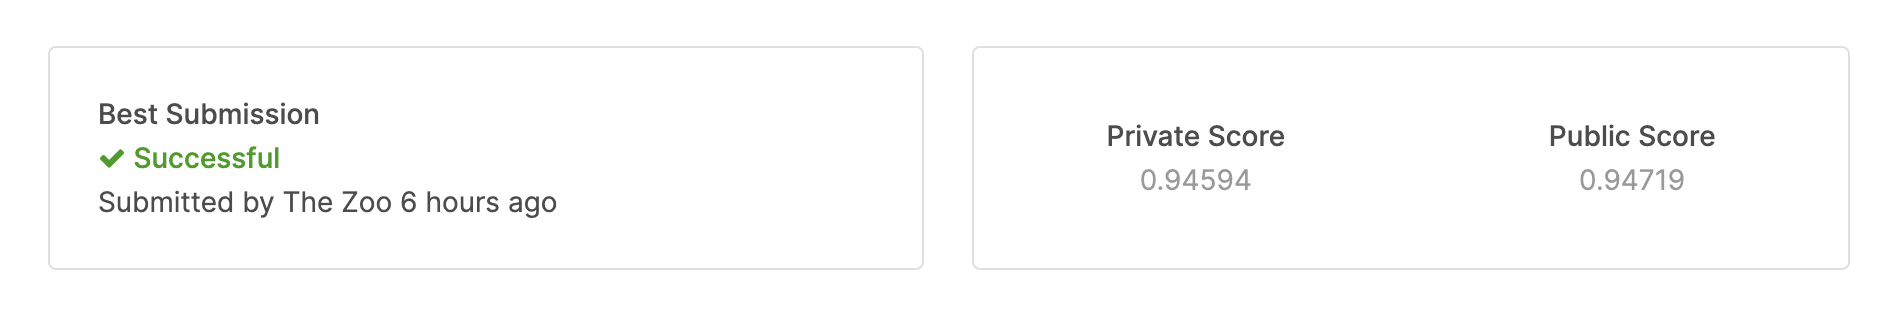